Available columns in the dataset:
- DriverNumber
- LapNumber
- Stint
- TyreLife
- AirTemp
- Humidity
- Pressure
- Rainfall
- TrackTemp
- WindDirection
- WindSpeed
- LapTimeSeconds
- Driver_ALO
- Driver_BEA
- Driver_BOT
- Driver_COL
- Driver_DEV
- Driver_GAS
- Driver_GIO
- Driver_GRO
- Driver_HAM
- Driver_HUL
- Driver_KUB
- Driver_KVY
- Driver_LAT
- Driver_LEC
- Driver_MAG
- Driver_MAZ
- Driver_MSC
- Driver_NOR
- Driver_OCO
- Driver_PER
- Driver_PIA
- Driver_RAI
- Driver_RIC
- Driver_RUS
- Driver_SAI
- Driver_SAR
- Driver_STR
- Driver_TSU
- Driver_VER
- Driver_VET
- Driver_ZHO
- Compound_MEDIUM
- Compound_SOFT
- Team_Alfa Romeo Racing
- Team_AlphaTauri
- Team_Alpine
- Team_Aston Martin
- Team_Ferrari
- Team_Haas F1 Team
- Team_Kick Sauber
- Team_McLaren
- Team_Mercedes
- Team_RB
- Team_Racing Point
- Team_Red Bull Racing
- Team_Renault
- Team_Toro Rosso
- Team_Williams
- TyreDegradation
- Rain_TrackTemp
- Rain_Humidity
- WindImpact


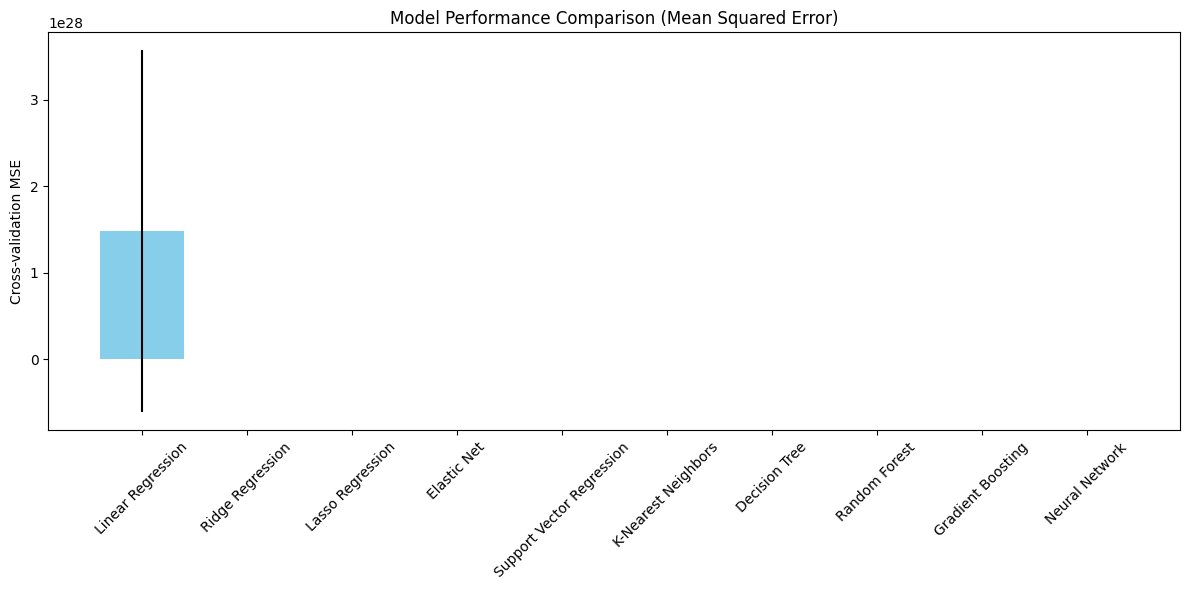


Detailed Model Performance Comparison:
------------------------------------------------------------

Linear Regression:
Cross-validation MSE: 14783518221798096337276764160.000 (+/- 41814330423736143643550941184.000)
Test Set MSE: 5.057
Test Set MAE: 0.890
R^2 Score: 0.306

Ridge Regression:
Cross-validation MSE: 5.467 (+/- 9.779)
Test Set MSE: 5.057
Test Set MAE: 0.890
R^2 Score: 0.306

Lasso Regression:
Cross-validation MSE: 4.791 (+/- 8.774)
Test Set MSE: 5.474
Test Set MAE: 0.990
R^2 Score: 0.249

Elastic Net:
Cross-validation MSE: 4.799 (+/- 8.889)
Test Set MSE: 5.295
Test Set MAE: 0.939
R^2 Score: 0.273

Support Vector Regression:
Cross-validation MSE: 5.035 (+/- 8.275)
Test Set MSE: 5.015
Test Set MAE: 0.702
R^2 Score: 0.312

K-Nearest Neighbors:
Cross-validation MSE: 6.791 (+/- 8.465)
Test Set MSE: 4.936
Test Set MAE: 0.732
R^2 Score: 0.323

Decision Tree:
Cross-validation MSE: 5.571 (+/- 7.800)
Test Set MSE: 2.142
Test Set MAE: 0.692
R^2 Score: 0.706

Random Forest:
Cross-vali

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('data_encoded.csv')

# Print column names to verify
print("Available columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

X = df.drop(columns=['LapTimeSeconds'])
y = df['LapTimeSeconds']




from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of regressors to try
regressors = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Elastic Net': ElasticNet(alpha=0.1, l1_ratio=0.5),
    'Support Vector Regression': SVR(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=500, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Neural Network': MLPRegressor(hidden_layer_sizes=(500, 50), max_iter=1000, random_state=42)
}

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to store results
results = {}

# Evaluate each classifier
for name, reg in regressors.items():
    
    cv_scores = cross_val_score(reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    
    # Train the model and get predictions
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'cv_mean': -cv_scores.mean(),  # Take negative to get positive MSE
        'cv_std': cv_scores.std(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

# Create visualizations
plt.figure(figsize=(12, 6))
cv_means = [results[name]['cv_mean'] for name in regressors.keys()]
cv_stds = [results[name]['cv_std'] for name in regressors.keys()]

# Plot average cross-validation scores (MSE)
plt.bar(regressors.keys(), cv_means, yerr=cv_stds, color='skyblue')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison (Mean Squared Error)')
plt.ylabel('Cross-validation MSE')
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Performance Comparison:")
print("-" * 60)
for name in regressors.keys():
    print(f"\n{name}:")
    print(f"Cross-validation MSE: {results[name]['cv_mean']:.3f} (+/- {results[name]['cv_std']*2:.3f})")
    print(f"Test Set MSE: {results[name]['mse']:.3f}")
    print(f"Test Set MAE: {results[name]['mae']:.3f}")
    print(f"R^2 Score: {results[name]['r2']:.3f}")

# Identify best performing model based on R^2
best_model = max(results.items(), key=lambda x: x[1]['r2'])
print(f"\nBest performing model: {best_model[0]} with R^2: {best_model[1]['r2']:.3f}")

Available columns in the dataset:
- DriverNumber
- LapNumber
- Stint
- TyreLife
- AirTemp
- Humidity
- Pressure
- Rainfall
- TrackTemp
- WindDirection
- WindSpeed
- LapTimeSeconds
- Driver_ALO
- Driver_BEA
- Driver_BOT
- Driver_COL
- Driver_DEV
- Driver_GAS
- Driver_GIO
- Driver_GRO
- Driver_HAM
- Driver_HUL
- Driver_KUB
- Driver_KVY
- Driver_LAT
- Driver_LEC
- Driver_MAG
- Driver_MAZ
- Driver_MSC
- Driver_NOR
- Driver_OCO
- Driver_PER
- Driver_PIA
- Driver_RAI
- Driver_RIC
- Driver_RUS
- Driver_SAI
- Driver_SAR
- Driver_STR
- Driver_TSU
- Driver_VER
- Driver_VET
- Driver_ZHO
- Compound_MEDIUM
- Compound_SOFT
- Team_Alfa Romeo Racing
- Team_AlphaTauri
- Team_Alpine
- Team_Aston Martin
- Team_Ferrari
- Team_Haas F1 Team
- Team_Kick Sauber
- Team_McLaren
- Team_Mercedes
- Team_RB
- Team_Racing Point
- Team_Red Bull Racing
- Team_Renault
- Team_Toro Rosso
- Team_Williams
- TyreDegradation
- Rain_TrackTemp
- Rain_Humidity
- WindImpact


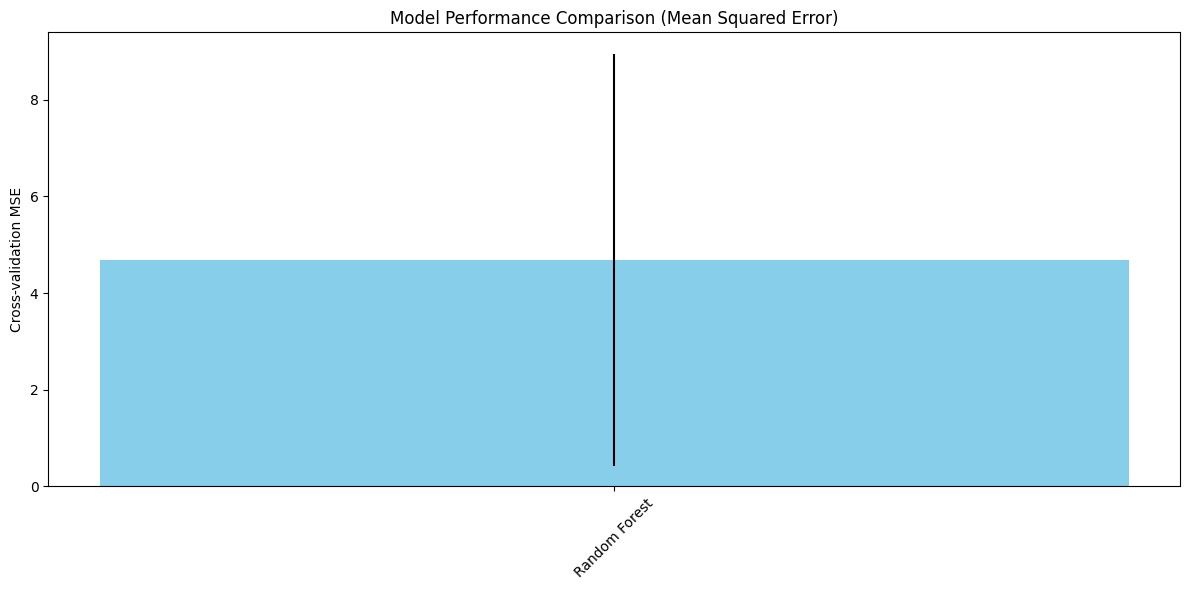


Detailed Model Performance Comparison:
------------------------------------------------------------

Random Forest:
Cross-validation MSE: 4.689 (+/- 8.518)
Test Set MSE: 1.770
Test Set MAE: 0.561
R^2 Score: 0.757

Best performing model: Random Forest with R^2: 0.757


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

# Read the data
df = pd.read_csv('data_encoded.csv')

# Print column names to verify
print("Available columns in the dataset:")
for col in df.columns:
    print(f"- {col}")

X = df.drop(columns=['LapTimeSeconds'])
y = df['LapTimeSeconds']




from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# List of regressors to try
regressors = {

    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    
}

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Dictionary to store results
results = {}

# Evaluate each classifier
for name, reg in regressors.items():
    
    cv_scores = cross_val_score(reg, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
    
    # Train the model and get predictions
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'cv_mean': -cv_scores.mean(),  # Take negative to get positive MSE
        'cv_std': cv_scores.std(),
        'mse': mse,
        'mae': mae,
        'r2': r2
    }

# Create visualizations
plt.figure(figsize=(12, 6))
cv_means = [results[name]['cv_mean'] for name in regressors.keys()]
cv_stds = [results[name]['cv_std'] for name in regressors.keys()]

# Plot average cross-validation scores (MSE)
plt.bar(regressors.keys(), cv_means, yerr=cv_stds, color='skyblue')
plt.xticks(rotation=45)
plt.title('Model Performance Comparison (Mean Squared Error)')
plt.ylabel('Cross-validation MSE')
plt.tight_layout()
plt.show()

# Print detailed results
print("\nDetailed Model Performance Comparison:")
print("-" * 60)
for name in regressors.keys():
    print(f"\n{name}:")
    print(f"Cross-validation MSE: {results[name]['cv_mean']:.3f} (+/- {results[name]['cv_std']*2:.3f})")
    print(f"Test Set MSE: {results[name]['mse']:.3f}")
    print(f"Test Set MAE: {results[name]['mae']:.3f}")
    print(f"R^2 Score: {results[name]['r2']:.3f}")

# Identify best performing model based on R^2
best_model = max(results.items(), key=lambda x: x[1]['r2'])
print(f"\nBest performing model: {best_model[0]} with R^2: {best_model[1]['r2']:.3f}")